In [0]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt
import cv2


     |████████████████████████████████| 81kB 4.8MB/s 


### WY DATA

In [0]:
import zipfile
with zipfile.ZipFile("Accident-Detection.zip","r") as zip_ref:
    zip_ref.extractall("data")

In [0]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 200
IMG_WIDTH = 200

In [0]:
train_image_generator = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True) # Generator for our training data
        
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [0]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory='/content/data/Accident-Detection/',
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           )

Found 4898 images belonging to 2 classes.


In [0]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory='/content/data/Accident-Detection/',
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              )

Found 4898 images belonging to 2 classes.


In [0]:
val_data_gen.class_indices

{'1': 0, '2': 1}

In [0]:
sample_training_images, _ = next(train_data_gen)
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

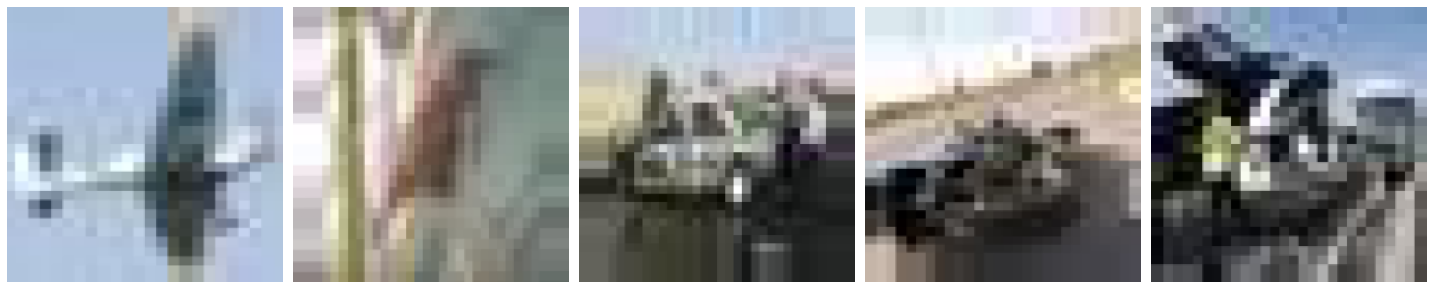

In [0]:
plotImages(sample_training_images[:5])

In [0]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH , 3) ),
    MaxPooling2D(),
    Conv2D(32, (3,3), padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, (3,3), padding='same', activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax'),
])

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20000)             0

In [0]:
history = model.fit_generator(
    train_data_gen,
    #steps_per_epoch=len(without_accident_train) + len(accident_train) // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    #validation_steps=len(without_accident_test) + len(accident_test) // batch_size
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
39/39 [==============================] - 45s 1s/step - loss: 0.6839 - accuracy: 0.6286 - val_loss: 0.6704 - val_accuracy: 0.6513
Epoch 2/15
39/39 [==============================] - 43s 1s/step - loss: 0.6126 - accuracy: 0.7832 - val_loss: 0.5947 - val_accuracy: 0.8181
Epoch 3/15
39/39 [==============================] - 43s 1s/step - loss: 0.5911 - accuracy: 0.8236 - val_loss: 0.5809 - val_accuracy: 0.8473
Epoch 4/15
39/39 [==============================] - 43s 1s/step - loss: 0.5835 - accuracy: 0.8410 - val_loss: 0.5761 - val_accuracy: 0.8573
Epoch 5/15
39/39 [==============================] - 43s 1s/step - loss: 0.5739 - accuracy: 0.8599 - val_loss: 0.5659 - val_accuracy: 0.8759
Epoch 6/15
39/39 [==============================] - 42s 1s/step - loss: 0.5746 - accuracy: 0.8581 - val_loss: 0.5653 - val_accuracy: 0.8804
Epoch 7/15
39/39 [==============================] - 42s 1s/step - loss: 0.5660 - acc

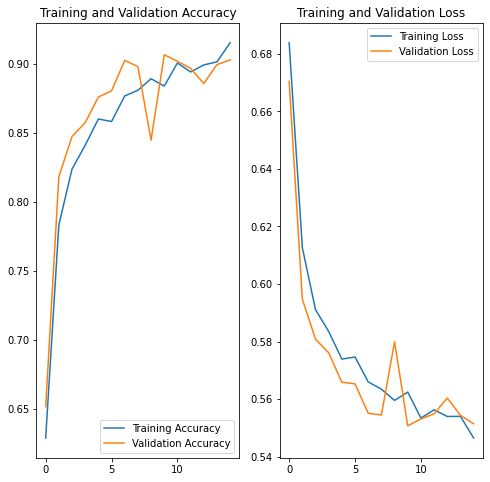

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [0]:
loss,acc = model.evaluate(val_data_gen, verbose=2)
print("Accuracy: {:5.5f}%".format(100*acc))

39/39 - 4s - loss: 0.5514 - accuracy: 0.9028
Accuracy: 90.28175%


In [0]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

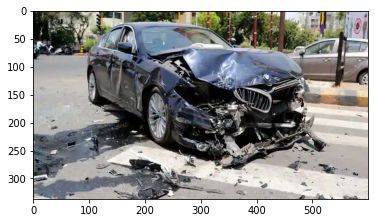

In [0]:

import matplotlib.image as mpimg

img=mpimg.imread('accidents_test.jpeg')
imgplot = plt.imshow(img)

In [0]:
img = cv2.imread('accidents_test.jpeg', cv2.IMREAD_UNCHANGED)
 
print('Original Dimensions : ',img.shape)
width = 200
height = 200
dim = (width, height)
# resize image
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
 
print('Resized Dimensions : ',resized.shape)

Original Dimensions :  (337, 600, 3)
Resized Dimensions :  (200, 200, 3)


In [0]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(resized,0))

print(img.shape)

(1, 200, 200, 3)


In [0]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[0.26894143 0.7310586 ]]
